In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
x=pd.DataFrame()
y=pd.DataFrame()
x["a"]=[1, 2, 3]
x["b"]=[2, 3, 4]
y["a"]=[0, 2, 3]
y["b"]=[0, 3, 4]
print(len(x))
print(y)
x.append(y.T, ignore_index=True)


3
   a  b
0  0  0
1  2  3
2  3  4


,a,b,0,1,2
0,1.0,2.0,NaN,NaN,NaN
1,2.0,3.0,NaN,NaN,NaN
2,3.0,4.0,NaN,NaN,NaN
3,NaN,NaN,0.0,2.0,3.0
4,NaN,NaN,0.0,3.0,4.0


In [172]:
import pandas as pd
data1=pd.read_csv("Daily_Residential_November.csv")
Household_ID=8
def data_set(data, H_id, count):
    total_data=pd.DataFrame()
    for i in range(0, count):
        data_house=data.iloc[(H_id-i-1)*24:(H_id-i)*24, :]
        data_house=data_house
        total_data=pd.concat([total_data,data_house], ignore_index=True)
    
    return total_data


In [174]:
data=data_set(data1, 8, 3)
data=data.values
work_data=data[:, 1:]
print(work_data.shape)
print(work_data)

(72, 30)
[[0.3720000000000001 0.515 0.36 ... 0.332 0.326 0.441]
 [0.26 0.441 0.319 ... 0.307 0.336 0.398]
 [0.222 0.391 0.278 ... 0.322 0.319 0.37]
 ...
 [0.7490000000000001 0.614 0.425 ... 0.632 0.597 0.315]
 [0.861 0.396 1.508 ... 0.669 0.261 0.512]
 [0.626 0.249 0.725 ... 0.5720000000000001 0.268 0.483]]


In [177]:
work_data=work_data.reshape(90, 24)

In [179]:
print(work_data[0,:])

[0.3720000000000001 0.515 0.36 0.41 0.282 0.485 0.395 0.43
 0.4320000000000001 0.4370000000000001 0.388 0.426 0.419
 0.5870000000000001 0.275 0.513 0.484 0.423 0.451 0.43 0.406 0.72 0.313
 0.278]


In [180]:
h1_dim=30
h2_dim=60
dim=24
batch_size=6

In [181]:

def generator_(z_noise):
    n_input=np.random.uniform(-1,1, size=(6, 24)).astype(np.float32)
    w1=tf.Variable(tf.truncated_normal([6, 24], stddev=0.1), name="w1_g", dtype=tf.float32)
    b1=tf.Variable(tf.zeros([24]), name="b1_g", dtype=tf.float32)
    h1=tf.nn.relu(tf.matmul(z_noise, w1)+b1)
    w2=tf.Variable(tf.truncated_normal([24, 6], stddev=0.1), name="w2_g", dtype=tf.float32)
    b2=tf.Variable(tf.zeros([6]), name="b2_g", dtype=tf.float32)
    h2=tf.nn.relu(tf.matmul(h1, w2)+b2)
    w3=tf.Variable(tf.truncated_normal([6,24], stddev=0.1), name="w3_g", dtype=tf.float32)
    b3=tf.Variable(tf.zeros([24]), name="b3_g", dtype=tf.float32)
    h3=tf.matmul(h2, w3) +b3
    out_gen = tf.nn.tanh(h3)
    #out_gen=out_gen+0.2*n_input
    weights_g=[w1, b1, w2, b2, w3,b3]
    return out_gen, weights_g

In [182]:


def discriminator_(x, out_gen, keep_prob):
    x_all=tf.concat([x, out_gen], 0)
    w1=tf.Variable(tf.truncated_normal([24, 24], stddev=0.1), name="w1_d", dtype=tf.float32)
    b1=tf.Variable(tf.zeros([24]), name="b1_d", dtype=tf.float32)
    h1=tf.nn.dropout(tf.nn.relu(tf.matmul(x_all, w1)+b1), keep_prob)
    w2=tf.Variable(tf.truncated_normal([24, 24], stddev=0.1), name="w3_d", dtype=tf.float32)
    b2=tf.Variable(tf.zeros([24]), name="b2_d", dtype=tf.float32)
    h2=tf.nn.dropout(tf.nn.relu(tf.matmul(h1, w2) + b2), keep_prob)
    w3=tf.Variable(tf.truncated_normal([24,24], stddev=0.1), name="w3_d", dtype=tf.float32)
    b3=tf.Variable(tf.zeros([24]), name="d_b3", dtype=tf.float32)
    h3=tf.matmul(h2,w3)+b3
    y_data=tf.nn.sigmoid(tf.slice(h3,[0,0], [batch_size, -1], name=None))
    y_fake=tf.nn.sigmoid(tf.slice(h3, [batch_size, 0], [batch_size,-1], name=None))
    print(y_data.shape)
    print(y_fake.shape)
    weights_d=[w1, b1, w2, b2, w3, b3]
    return y_data, y_fake, weights_d
                         

In [183]:

x=tf.placeholder(tf.float32, [6, 24], name="x-data")
z_noise=tf.placeholder(tf.float32, [24, 6], name="z_prior")
# Dropout probability
keep_prob=tf.placeholder(tf.float32, name="keep_prob")
# generate the output ops for generator and also define the weights
out_gen, weights_g=generator_(z_noise)
# Define the output ops and weihts for Discriminator
y_data, y_fake, weights_d= discriminator_(x, out_gen, keep_prob)
# Cost function for Discriminator and Generator
discr_loss= -(tf.log(y_data) + tf.log(1-y_fake))
gen_loss= - tf.log(y_fake)
optimizer=tf.train.AdamOptimizer(0.0001)
d_trainer=optimizer.minimize(discr_loss, var_list=weights_d)
g_trainer=optimizer.minimize(gen_loss, var_list=weights_g)
init = tf.global_variables_initializer()
saver=tf.train.Saver()

(6, 24)
(6, 24)


In [184]:
print(y_data.shape)

(6, 24)


In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
batch_x1=np.array(work_data)
batch_x=scaler.fit_transform(batch_x1)
batch_x=batch_x
print(batch_x.shape)

(90, 24)


C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [187]:


sess=tf.Session()
sess.run(init)
z_sample=np.random.uniform(-1,1, size=(24, batch_size)).astype(np.float32)

for i in range(4000):
    
    rand_index=np.random.choice(len(data), size=batch_size) 
    x_value=batch_x[rand_index]
     
    z_value= np.random.uniform(-1,1, size=(24, batch_size)).astype(np.float32)
    sess.run(d_trainer, feed_dict={x:x_value, z_noise:z_value, keep_prob:0.7})
    sess.run(g_trainer, feed_dict={x:x_value, z_noise:z_value, keep_prob:0.7})
    [c1,c2]=sess.run([discr_loss, gen_loss], feed_dict={x:x_value, z_noise:z_value, keep_prob:0.07})
    #print('iter:', i, 'cost of discriminator', c1, "cost of generator", c2)
    

out_val_img=sess.run(out_gen, feed_dict={z_noise: z_sample})
saver.save(sess, "./GAN_Data", global_step=i)
#-------------------------------------------------------------------------------------------


'./GAN_Data-3999'

In [188]:
Y_output=scaler.inverse_transform(c1)

In [192]:
data.shape
Y_actual= work_data[-6:, :]
print(Y_actual)

[[0.312 0.6940000000000001 0.297 0.35200000000000004 1.136 0.614 0.309
  0.88 1.204 0.287 0.65 0.763 0.252 0.481 0.325 0.219 0.219 0.628 0.499
  0.332 0.222 0.55 0.259 0.517]
 [0.637 0.215 0.7509999999999999 0.635 0.991 0.546 0.521
  0.8059999999999999 0.281 0.334 0.777 0.782 0.28300000000000003 0.748
  0.898 1.099 0.441 0.72 0.239 0.502 0.636 0.483 0.319 0.7440000000000001]
 [0.523 0.314 0.481 0.5579999999999999 0.5820000000000001 0.426
  0.7490000000000001 0.614 0.425 0.402 1.256 0.701 0.6629999999999999
  0.8059999999999999 0.282 0.326 0.39 0.758 0.281 0.6609999999999999 1.0
  0.8809999999999999 0.561 0.642]
 [0.281 1.169 0.295 0.6559999999999999 0.409 0.608 0.277 0.338 0.611
  0.632 0.597 0.315 0.861 0.396 1.508 0.269 0.471 0.711 0.402
  0.7909999999999999 0.284 0.39 0.345 0.539]
 [0.3 0.5539999999999999 0.364 0.77 0.6659999999999999 0.574 0.505
  1.5019999999999998 0.26 0.621 0.237 0.322 0.255 0.331 0.243 0.669 0.261
  0.512 0.626 0.249 0.725 0.34600000000000003 0.448 0.599]
 [0.5

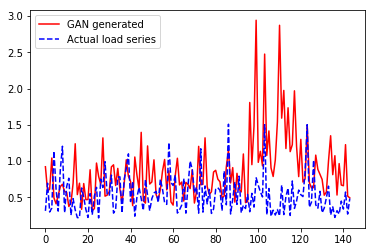

In [195]:
Y_GAN=Y_output.flatten()
Y_GAN=Y_GAN/2
Y_actual= work_data[-6:, :]
Y_actual=Y_actual.flatten()
plt.plot(Y_GAN, 'r-', label='GAN generated')
plt.plot(Y_actual, 'b--', label='Actual load series')
plt.legend(loc='upper left')
plt.show()

In [98]:
import math
def Mape(actual,pred):
    if (not len(actual) == len(pred) or len(actual) == 0):
        return -1.0
    total = 0.0
    cons = 0.1
    for x in range(len(actual)):
         if (actual[x] <=cons):
            total += abs((actual[x]-pred[x])/(cons+actual[x]))
         else: 
            total += abs((actual[x]-pred[x])/actual[x])*100
    return total/len(actual)

In [99]:
import math
def Rmse(actual,pred):
	if (not len(actual) == len(pred) or len(actual) == 0):
		return -1.0
	sumSquares = 0.0
	for x in range(len(actual)):
		sumSquares += math.pow(pred[x]-actual[x],2.0)
	return math.sqrt(sumSquares/len(actual))

In [20]:
from scipy.stats import uniform, norm
import seaborn as sns

In [61]:
input_data_2000=np.array(Residuals_2000)
input_data1=input_data_2000.ravel()
input_data_4000=np.array(Residuals_4000)
input_data2=input_data_4000.ravel()
input_data_6000=np.array(Residuals_6000)
input_data3=input_data_6000.ravel()
print(input_data.shape)

(720,)


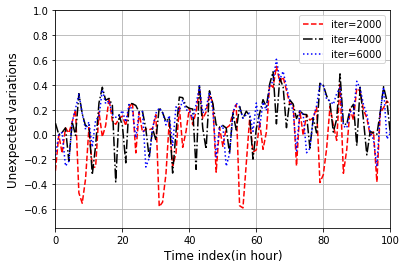

In [57]:
plt.plot(input_data1, 'r--', label='iter=2000')
plt.plot(input_data2, 'k-.', label='iter=4000')
plt.plot(input_data3, 'b:', label='iter=6000')
plt.xlabel('Time index(in hour)',fontsize=12)
plt.ylabel('Unexpected variations', fontsize=12)
plt.grid(True)
plt.axis([0, 100, -0.75, 1])
plt.legend(loc='upper right')
plt.show()

In [62]:
def vector_series(data, seq):
    data_2D=[]
    for i in range((len(data)-seq+1)):
        data_2D.append(data[i:i+seq])
    return data_2D

In [63]:
matrix_load1=vector_series(input_data2, 24)
print(type(matrix_load1))
matrix_load=np.array(matrix_load1)

<class 'list'>


In [64]:
print(matrix_load.shape)

(697, 24)


In [65]:
# split dataset: 90% for training and 10% for testing
train_row = int(round(0.965 * matrix_load.shape[0]))
train_set = matrix_load[:train_row, :]
#0.967 for Rainy days, 0.9777 for sunny days , 0.9779 for cloudy and 0.9918 for all data set
# shuffle the training set (but do not shuffle the test set)
np.random.shuffle(train_set)
# the training set
X_train = train_set[:, :-1]
# the last column is the true value to compute the mean-squared-error loss
y_train = train_set[:, -1] 
# the test set
X_test = matrix_load[train_row:, :-1]
y_test = matrix_load[train_row:, -1]
#########################################################
# scalerX = StandardScaler().fit(X_train)
# scalery = StandardScaler().fit(y_train)
# X_train = scalerX.transform(X_train)
# y_train = scalery.transform(y_train)
# X_test = scalerX.transform(X_test)
# y_test=y_test
print(train_row)
print(len(y_test))

673
24
